# Понижение размерности

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = [11, 8]

## Метод главных компонент (Principal Component Analysis, PCA)

Рассмотрим метод главных компонент.

Этот метод делает два важных упрощения задачи:

1. Игнорируется целевая переменная
2. Строится линейная комбинация признаков

П. 1 на первый взгляд кажется довольно странным, но на практике обычно не является
таким уж плохим. Это связано с тем, что часто данные устроены так, что имеют какую-то
внутреннюю структуру в пространстве меньшей размерности, которая никак не связана с
целевой переменной. Поэтому и оптимальные признаки можно строить, не глядя на ответ.

П. 2 тоже сильно упрощает задачу, но далее мы научимся избавляться от него.

### PCA на плоскости

Для начала посмотрим на метод PCA на плоскости для того, чтобы
лучше понять, как он устроен.

Попробуем специально сделать один из признаков более значимым и проверим, что PCA это обнаружит. Сгенерируем выборку из двухмерного гауссовского распределения. Обратите внимание, что выборка
изначально выбирается центрированной.

In [3]:
np.random.seed(314512)

data_synth_1 = np.random.multivariate_normal(
    mean = [0, 0], 
    cov = [[4, 0], 
           [0, 1]],
    size = 1000)

In [4]:
data_synth_1

array([[ 0.07527392, -0.74451881],
       [-3.83034246,  0.98399829],
       [-3.20496919, -0.17475634],
       ...,
       [ 2.60065613, -1.64750201],
       [-2.29223513,  1.50755129],
       [-0.9566145 , -0.58103135]])

In [5]:
import pandas as pd

In [6]:
pd.DataFrame(data_synth_1).head()

,0,1
0,0.075274,-0.744519
1,-3.830342,0.983998
2,-3.204969,-0.174756
3,0.103332,-0.381390
4,1.947189,-0.989389


In [19]:
pd.DataFrame(data_synth_1)[1].std()**2

0.953998650901417

In [7]:
data_synth_1

array([[ 0.07527392, -0.74451881],
       [-3.83034246,  0.98399829],
       [-3.20496919, -0.17475634],
       ...,
       [ 2.60065613, -1.64750201],
       [-2.29223513,  1.50755129],
       [-0.9566145 , -0.58103135]])

Теперь изобразим точки выборки на плоскости и применим к ним PCA для нахождения главных компонент.
В результате работы PCA из sklearn в `dec.components_` будут лежать главные направления (нормированные), а в `dec.explained_variance_` &mdash; дисперсия, которую объясняет каждая компонента. Изобразим на нашем графике эти направления, умножив их на дисперсию для наглядного отображения их
значимости.

In [8]:
from sklearn.decomposition import PCA

Help on Axes in module matplotlib.axes._axes object:

class Axes(matplotlib.axes._base._AxesBase)
 |  Axes(fig, *args, facecolor=None, frameon=True, sharex=None, sharey=None, label='', xscale=None, yscale=None, box_aspect=None, **kwargs)
 |  
 |  An Axes object encapsulates all the elements of an individual (sub-)plot in
 |  a figure.
 |  
 |  It contains most of the (sub-)plot elements: `~.axis.Axis`,
 |  `~.axis.Tick`, `~.lines.Line2D`, `~.text.Text`, `~.patches.Polygon`, etc.,
 |  and sets the coordinate system.
 |  
 |  Like all visible elements in a figure, Axes is an `.Artist` subclass.
 |  
 |  The `Axes` instance supports callbacks through a callbacks attribute which
 |  is a `~.cbook.CallbackRegistry` instance.  The events you can connect to
 |  are 'xlim_changed' and 'ylim_changed' and the callback will be called with
 |  func(*ax*) where *ax* is the `Axes` instance.
 |  
 |  .. note::
 |  
 |      As a user, you do not instantiate Axes directly, but use Axes creation
 |     

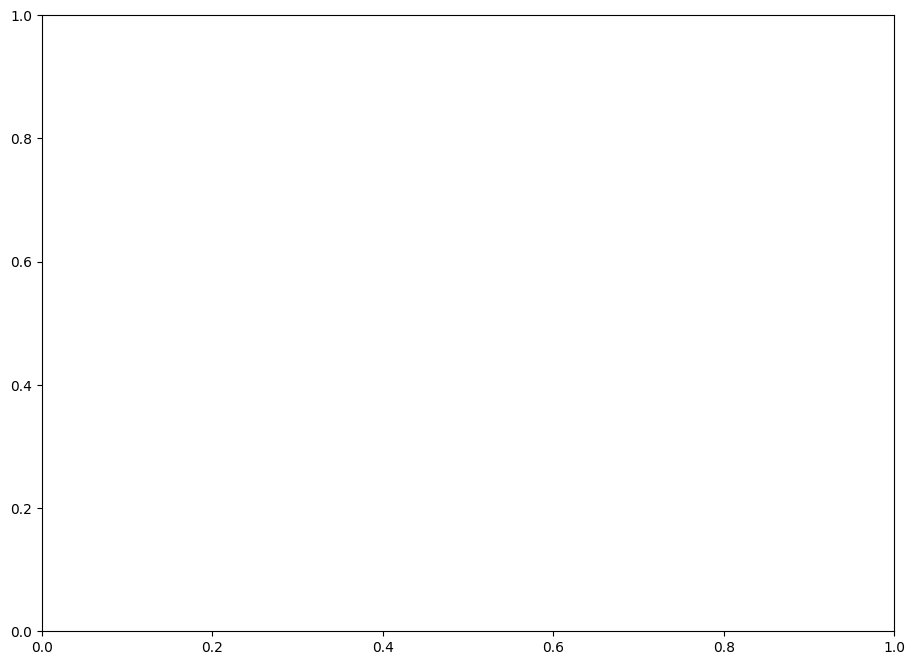

In [9]:
help(plt.gca()) #Get the current Axes

In [10]:
help(PCA())

Help on PCA in module sklearn.decomposition._pca object:

class PCA(sklearn.decomposition._base._BasePCA)
 |  PCA(n_components=None, *, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', n_oversamples=10, power_iteration_normalizer='auto', random_state=None)
 |  
 |  Principal component analysis (PCA).
 |  
 |  Linear dimensionality reduction using Singular Value Decomposition of the
 |  data to project it to a lower dimensional space. The input data is centered
 |  but not scaled for each feature before applying the SVD.
 |  
 |  It uses the LAPACK implementation of the full SVD or a randomized truncated
 |  SVD by the method of Halko et al. 2009, depending on the shape of the input
 |  data and the number of components to extract.
 |  
 |  With sparse inputs, the ARPACK implementation of the truncated SVD can be
 |  used (i.e. through :func:`scipy.sparse.linalg.svds`). Alternatively, one
 |  may consider :class:`TruncatedSVD` where the data are not centered.


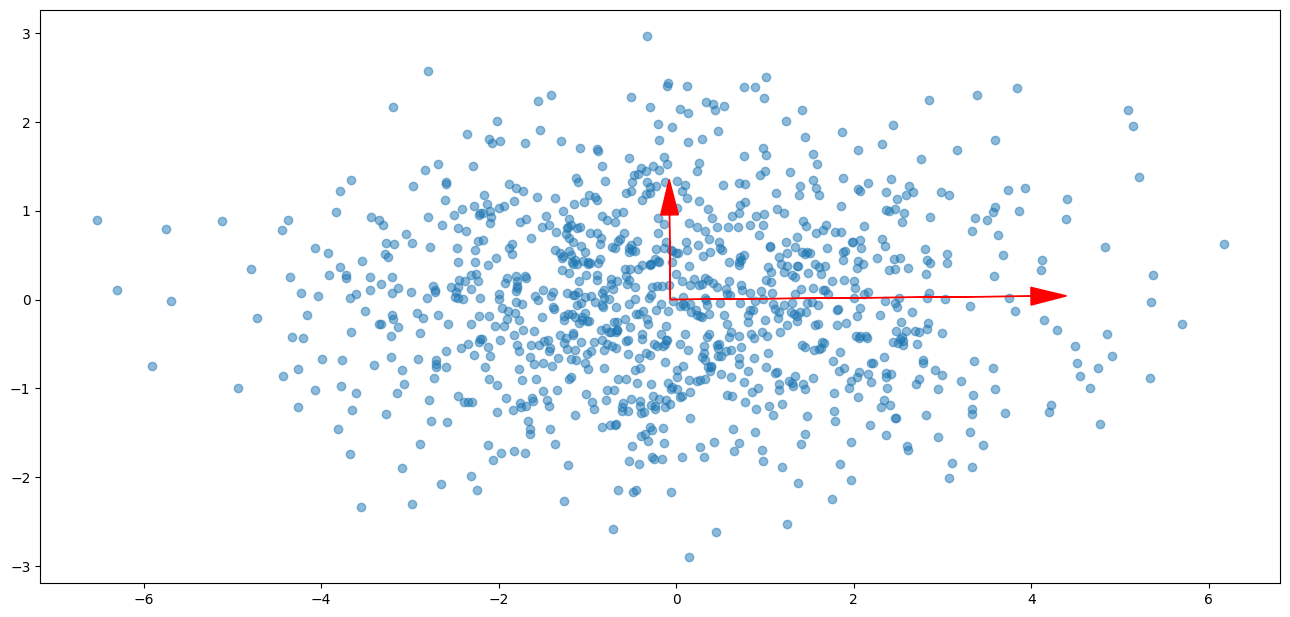

In [20]:
def PCA_show(dataset):
    plt.scatter(*zip(*dataset), alpha = 0.5)
    dec = PCA()
    dec.fit(dataset) # обучаем PCA
    ax = plt.gca()
    for comp_ind in range(dec.components_.shape[0]): # пробегаемся по выделенным компонентам (осям)
        component = dec.components_[comp_ind, :] # компонента
        var = dec.explained_variance_[comp_ind] # объясненная дисперсия
        start, end = dec.mean_, component * var
        ax.arrow(start[0], start[1], end[0], end[1],
                 head_width = 0.2, head_length = 0.4, fc = 'r', ec = 'r')
    ax.set_aspect('equal', adjustable='box')

plt.figure(figsize = (16, 8))
PCA_show(data_synth_1)

In [21]:
dec = PCA()
dec.fit(data_synth_1) # обучаем PCA
for comp_ind in range(dec.components_.shape[0]): # пробегаемся по выделенным компонентам (осям)
    component = dec.components_[comp_ind, :] # компонента
    var = dec.explained_variance_[comp_ind] # объясненная дисперсия
    print('Компонента:', component)
    print('Дисперсия:', var)

Компонента: [0.99995704 0.00926927]
Дисперсия: 4.063792689007089
Компонента: [-0.00926927  0.99995704]
Дисперсия: 0.9537314363209557


Видим, что PCA все правильно нашел. Но это, конечно, можно было сделать и просто посчитав
дисперсию каждого признака. Повернем наши данные на некоторый фиксированный угол и проверим,
что для PCA это ничего не изменит.

In [22]:
np.pi

3.141592653589793

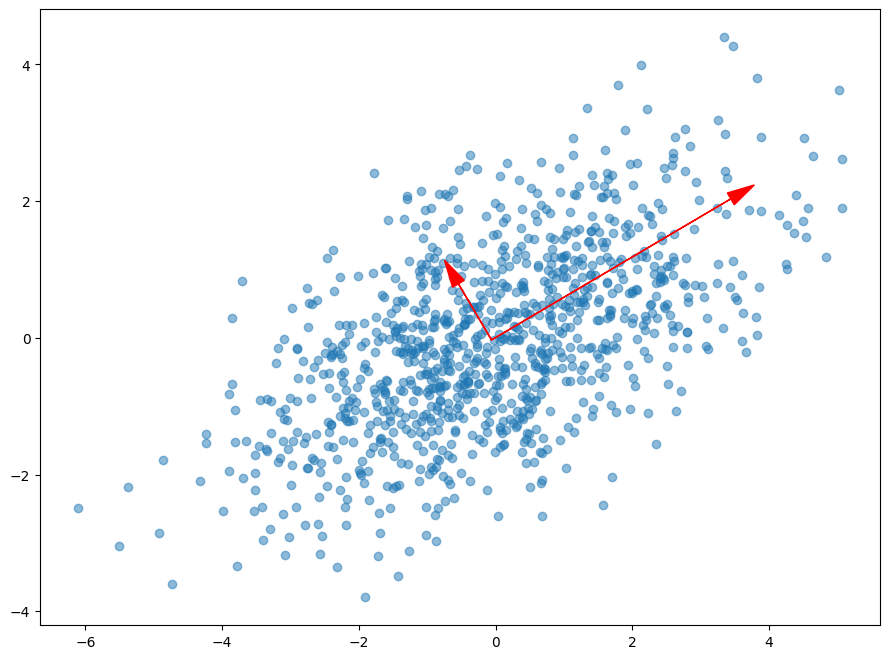

In [23]:
angle = np.pi / 6
rotate = np.array([
        [np.cos(angle), - np.sin(angle)],
        [np.sin(angle), np.cos(angle)],
    ])
data_synth_2 = rotate.dot(data_synth_1.T).T

plt.figure(figsize = (16, 8))
PCA_show(data_synth_2)

In [24]:
dec = PCA()
dec.fit(data_synth_2) # обучаем PCA
for comp_ind in range(dec.components_.shape[0]): # пробегаемся по выделенным компонентам (осям)
    component = dec.components_[comp_ind, :] # компонента
    var = dec.explained_variance_[comp_ind] # объясненная дисперсия
    print('Компонента:', component)
    print('Дисперсия:', var)

Компонента: [0.86135356 0.50800594]
Дисперсия: 4.063792689007089
Компонента: [-0.50800594  0.86135356]
Дисперсия: 0.9537314363209551


Ну вот, все нормально. 

Ниже пара примеров, где PCA отработал не так хорошо (в том смысле, что направления задают не очень хорошие признаки).

**Упражнение.** Объясните, почему так произошло.

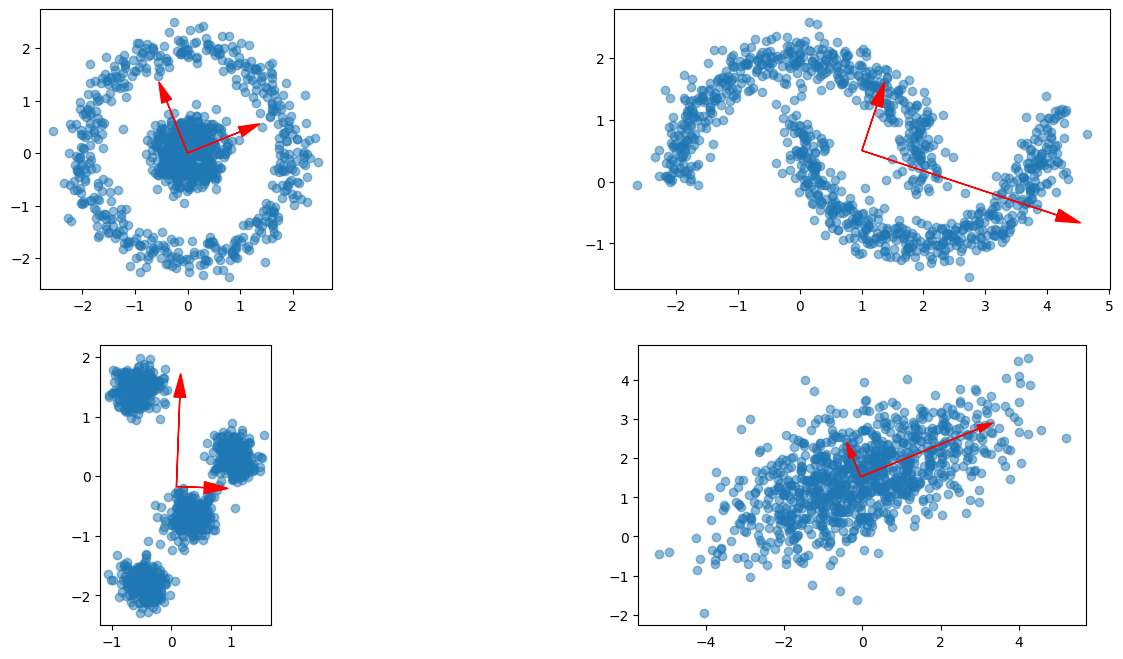

In [25]:
from sklearn.datasets import make_circles, make_moons, make_blobs

np.random.seed(54242)
data_synth_bad = [
    make_circles(n_samples=1000, factor=0.2, noise=0.1)[0]*2,
    make_moons(n_samples=1000, noise=0.1)[0]*2,
    make_blobs(n_samples=1000, n_features=2, centers=4)[0]/5,
    np.random.multivariate_normal(
        mean=[0, 1.5], 
        cov=[[3, 1], 
             [1, 1]],
        size=1000),
]


plt.figure(figsize=(16,8))
rows, cols = 2, 2
for i, data in enumerate(data_synth_bad):
    plt.subplot(rows, cols, i + 1)
    PCA_show(data)

### Лица людей

Рассмотрим датасет с фотографиями лиц людей и применим к его признакам PCA.

Ниже изображены примеры лиц из базы, и последняя картинка &mdash; это "среднее лицо".

In [26]:
import ssl
from urllib.request import urlopen

ssl._create_default_https_context = ssl._create_unverified_context

In [27]:
from sklearn.datasets import fetch_olivetti_faces

In [28]:
help(fetch_olivetti_faces)

Help on function fetch_olivetti_faces in module sklearn.datasets._olivetti_faces:

fetch_olivetti_faces(*, data_home=None, shuffle=False, random_state=0, download_if_missing=True, return_X_y=False, n_retries=3, delay=1.0)
    Load the Olivetti faces data-set from AT&T (classification).
    
    Download it if necessary.
    
    =================   =====================
    Classes                                40
    Samples total                         400
    Dimensionality                       4096
    Features            real, between 0 and 1
    =================   =====================
    
    Read more in the :ref:`User Guide <olivetti_faces_dataset>`.
    
    Parameters
    ----------
    data_home : str or path-like, default=None
        Specify another download and cache folder for the datasets. By default
        all scikit-learn data is stored in '~/scikit_learn_data' subfolders.
    
    shuffle : bool, default=False
        If True the order of the dataset is shuffl

In [36]:
faces

{'data': array([[-0.31335747, -0.335062  , -0.36057845, ..., -0.11067145,
          0.0045352 ,  0.18128088],
        [ 0.20317143,  0.15254131,  0.06504136, ...,  0.20751035,
          0.18222114,  0.18541309],
        [ 0.34366733,  0.3384917 ,  0.32537198, ..., -0.01976237,
         -0.03265488, -0.15342987],
        ...,
        [-0.09021696, -0.06646696, -0.05892557, ..., -0.16852269,
         -0.15248959, -0.15342987],
        [-0.0282335 , -0.00448349, -0.00520656, ...,  0.02569219,
          0.0045352 ,  0.07384285],
        [-0.11087814, -0.14497936, -0.24074374, ...,  0.00503105,
          0.05412197,  0.08623955]], dtype=float32),
 'images': array([[[0.08677686, 0.09917355, 0.11570248, ..., 0.3429752 ,
          0.23553719, 0.20661157],
         [0.11157025, 0.10743801, 0.11570248, ..., 0.39256197,
          0.23553719, 0.1694215 ],
         [0.11570248, 0.11570248, 0.11157025, ..., 0.41322315,
          0.28099173, 0.17355372],
         ...,
         [0.32231405, 0.3264463 

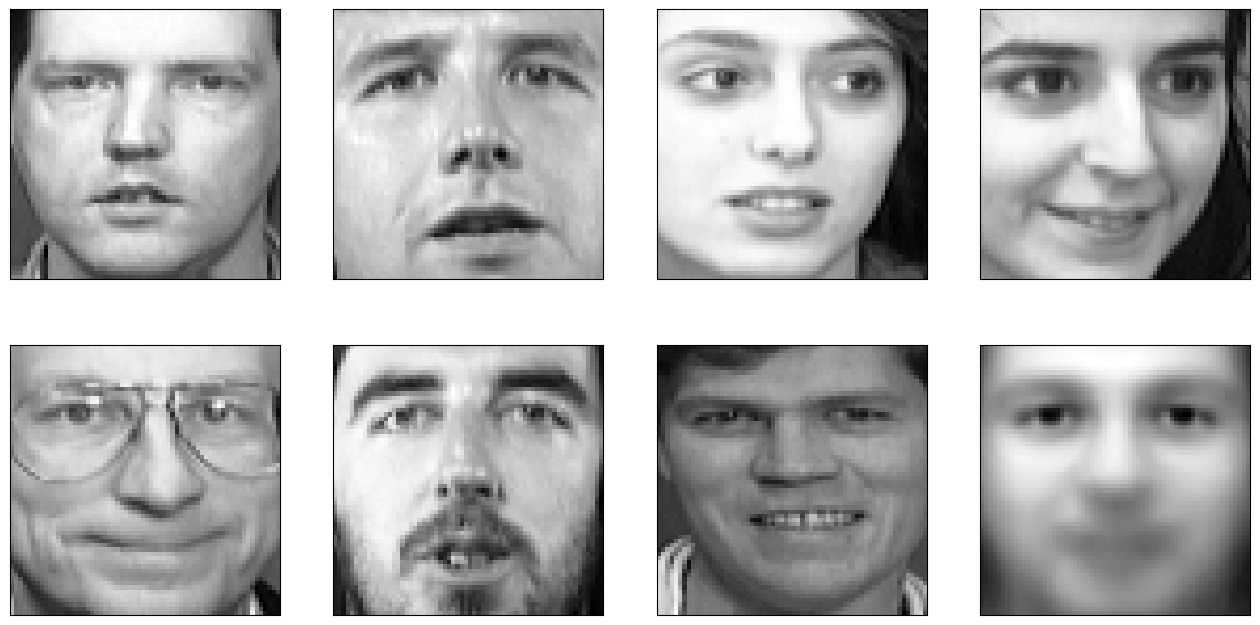

In [29]:
faces = fetch_olivetti_faces(shuffle = True, random_state = 432542)
faces_images = faces.data
faces_ids = faces.target
image_shape = (64, 64)
    
mean_face = faces_images.mean(axis=0)

plt.figure(figsize=(16, 8))
rows, cols = 2, 4
n_samples = rows * cols
for i in range(n_samples - 1):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(faces_images[i, :].reshape(image_shape), interpolation='none',
               cmap='gray')
    plt.xticks(())
    plt.yticks(())
    
plt.subplot(rows, cols, n_samples)
plt.imshow(mean_face.reshape(image_shape), interpolation='none',
           cmap='gray')
plt.xticks(())
_ = plt.yticks(())

Теперь найдем главные компоненты

In [35]:
help(PCA())

Help on PCA in module sklearn.decomposition._pca object:

class PCA(sklearn.decomposition._base._BasePCA)
 |  PCA(n_components=None, *, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', n_oversamples=10, power_iteration_normalizer='auto', random_state=None)
 |  
 |  Principal component analysis (PCA).
 |  
 |  Linear dimensionality reduction using Singular Value Decomposition of the
 |  data to project it to a lower dimensional space. The input data is centered
 |  but not scaled for each feature before applying the SVD.
 |  
 |  It uses the LAPACK implementation of the full SVD or a randomized truncated
 |  SVD by the method of Halko et al. 2009, depending on the shape of the input
 |  data and the number of components to extract.
 |  
 |  With sparse inputs, the ARPACK implementation of the truncated SVD can be
 |  used (i.e. through :func:`scipy.sparse.linalg.svds`). Alternatively, one
 |  may consider :class:`TruncatedSVD` where the data are not centered.


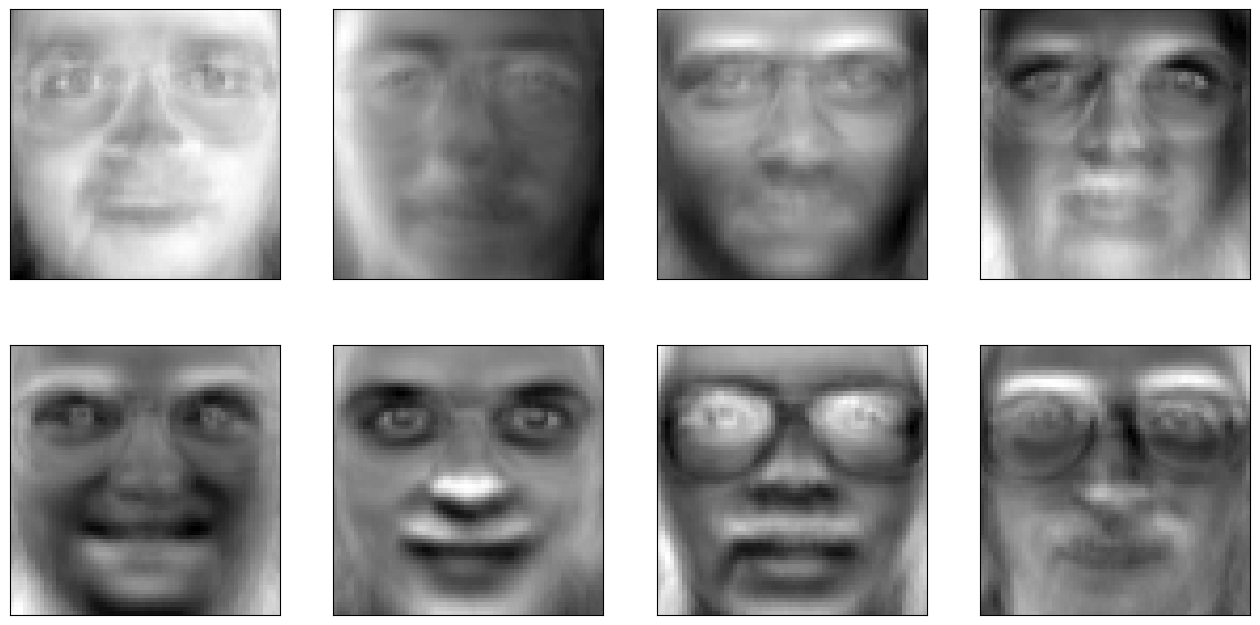

In [30]:
red = PCA()
faces_images -= mean_face
red.fit(faces_images)

plt.figure(figsize=(16, 8))
rows, cols = 2, 4
n_samples = rows * cols
for i in range(n_samples):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(red.components_[i, :].reshape(image_shape), interpolation='none',
               cmap='gray')
    plt.xticks(())
    plt.yticks(())

Получилось жутковато, что уже неплохо, но есть ли от этого какая-то польза?

Во-первых, новые признаки дают более высокое качество классификации.

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

gscv_rf = GridSearchCV(RandomForestClassifier(),
                       {'n_estimators': [100, 200, 500, 800], 'max_depth': [2, 3, 4, 5]},
                       cv=3)

In [32]:
%%time

gscv_rf.fit(faces_images, faces_ids)
print(gscv_rf.best_score_)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


0.7547600344143942
CPU times: user 1min 10s, sys: 665 ms, total: 1min 11s
Wall time: 1min 12s


In [33]:
%%time

gscv_rf.fit(red.transform(faces_images)[:,:100], faces_ids)
print(gscv_rf.best_score_)

0.8798301724460403
CPU times: user 25 s, sys: 1.41 s, total: 26.4 s
Wall time: 24.4 s


Во-вторых, их можно использовать для компактного хранения данных. Для этого объекты трансформируются
в новое пространство, и из него выкидываются самые незначимые признаки.

Ниже приведены результаты сжатия в 20 раз.

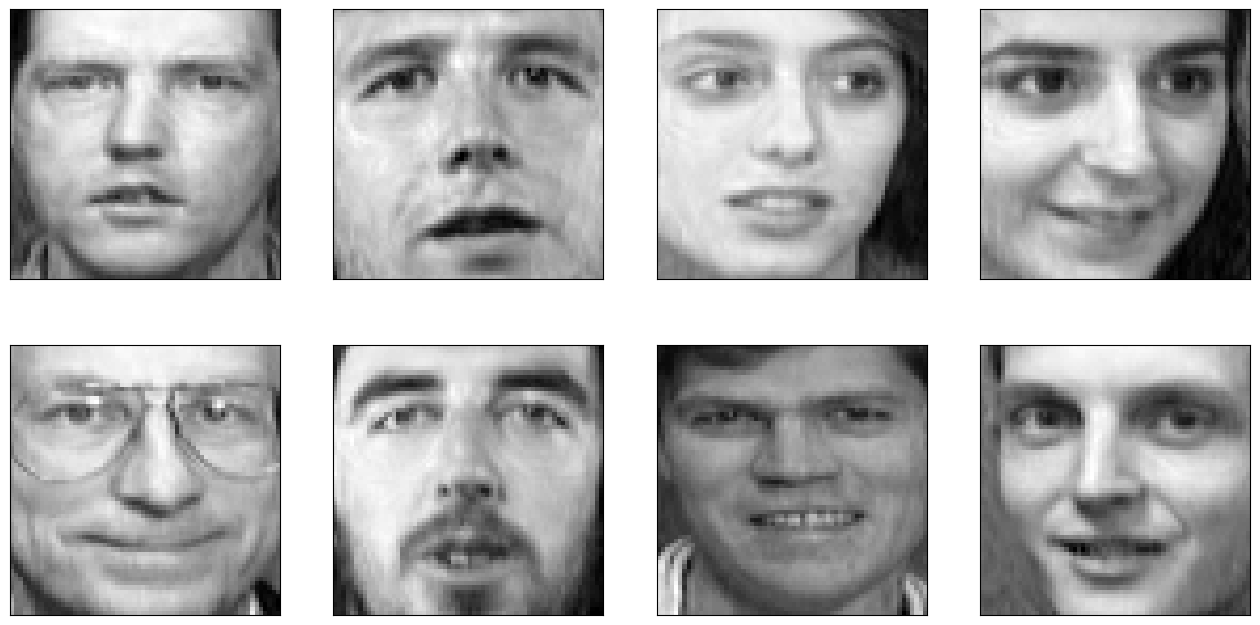

In [34]:
base_size = min(image_shape[0] * image_shape[1], faces_images.shape[0])

def compress_and_show(compress_ratio):
    red = PCA(n_components = int(base_size * compress_ratio))
    red.fit(faces_images)
    faces_compressed = red.transform(faces_images) # трансформируем данные с помощью PCA (проецируем точки на выделенные оси)
    faces_restored = red.inverse_transform(faces_compressed) + mean_face # обратное преобразование (восстанавливаем данные)
    plt.figure(figsize=(16, 8))
    rows, cols = 2, 4
    n_samples = rows * cols
    for i in range(n_samples):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(faces_restored[i, :].reshape(image_shape), interpolation='none',
                   cmap='gray')
        plt.xticks(())
        plt.yticks(())
        
compress_and_show(0.5)

In [39]:
base_size

400

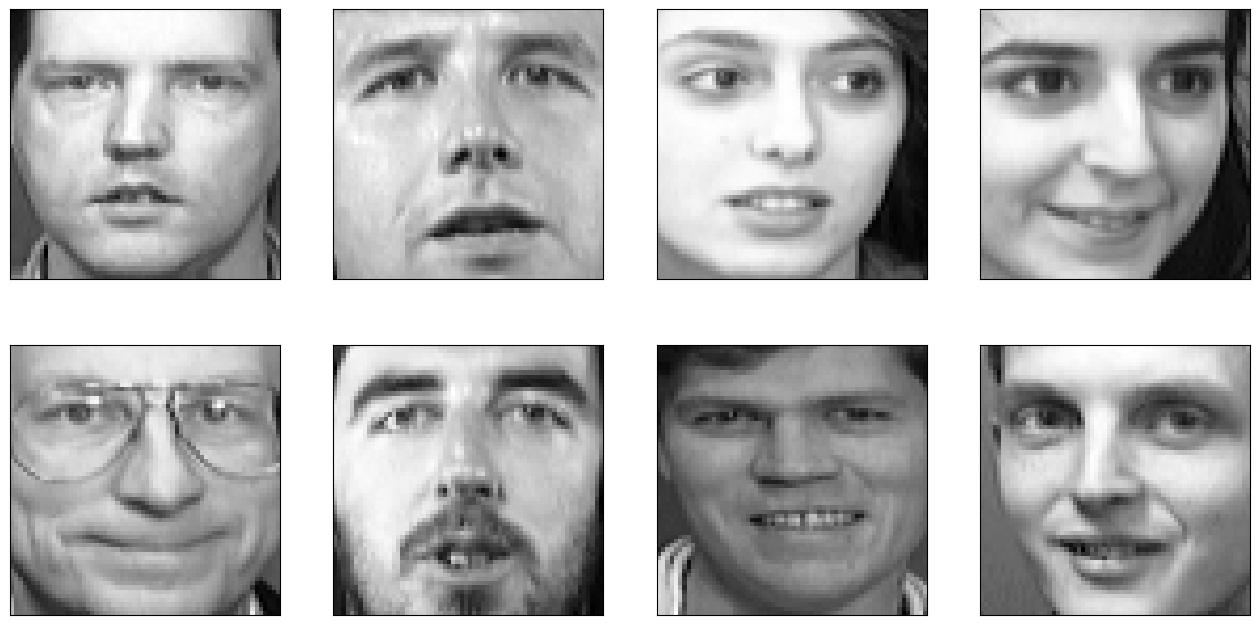

In [38]:
compress_and_show(1)

### PCA с ядрами

Так как PCA фактически работает не c исходными признаками, а с матрицей их ковариаций, можно
использовать для ее вычисления вместо скалярного произведения $\langle x_i, x_j \rangle$ произвольное
ядро $K(x_i, x_j)$. Это будет соответствовать переходу в другое пространство, в котором
наше предположение о линейности уже будет иметь смысл. Единственная проблема &mdash; непонятно, как
подбирать ядро.

Ниже приведены примеры объектов в исходном пространстве (похожие группы обозначены одним цветом
для наглядности), и результат их трансформации в новые пространства (для разных ядер). Если результаты
получаются линейно разделимыми &mdash; значит мы выбрали подходящее ядро.

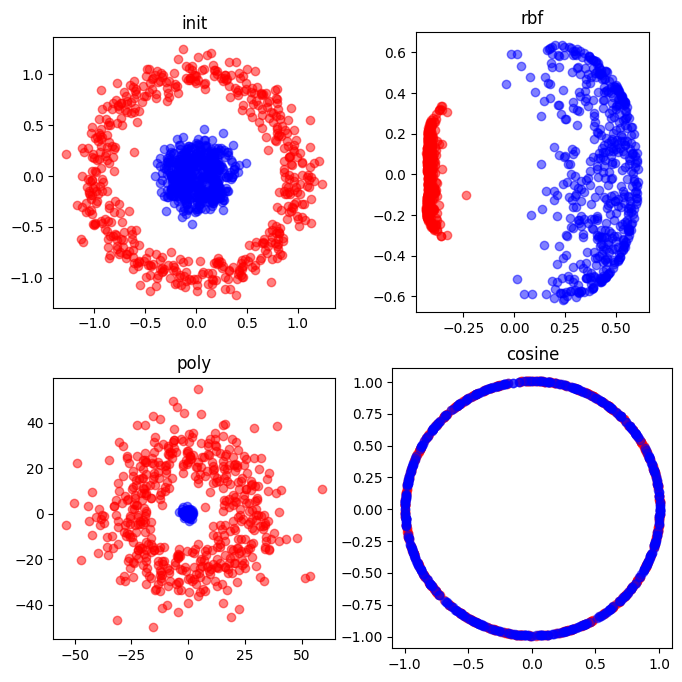

In [40]:
from sklearn.decomposition import KernelPCA


def KPCA_show(X, y):
    reds = y == 0
    blues = y == 1
    
    plt.figure(figsize=(8, 8))
    rows, cols = 2, 2
    plt.subplot(rows, cols, 1)
    plt.title('init')
    plt.scatter(X[reds, 0], X[reds, 1], alpha=0.5, c='r')
    plt.scatter(X[blues, 0], X[blues, 1], alpha=0.5, c='b')
    ax = plt.gca()
    ax.set_aspect('equal', adjustable='box')
    
    kernels_params = [
        dict(kernel='rbf', gamma=5),
        dict(kernel='poly', gamma=10),
        dict(kernel='cosine', gamma=10),
    ]
    
    for i, p in enumerate(kernels_params):
        dec = KernelPCA(**p)
        X_transformed = dec.fit_transform(X)
        
        plt.subplot(rows, cols, i + 2)
        plt.title(p['kernel'])
        plt.scatter(X_transformed[reds, 0], X_transformed[reds, 1], alpha=0.5, c='r')
        plt.scatter(X_transformed[blues, 0], X_transformed[blues, 1], alpha=0.5, c='b')
        ax = plt.gca()
        ax.set_aspect('equal', adjustable='box')
        
np.random.seed(54242)
KPCA_show(*make_circles(n_samples = 1000, factor = 0.2, noise = 0.1))

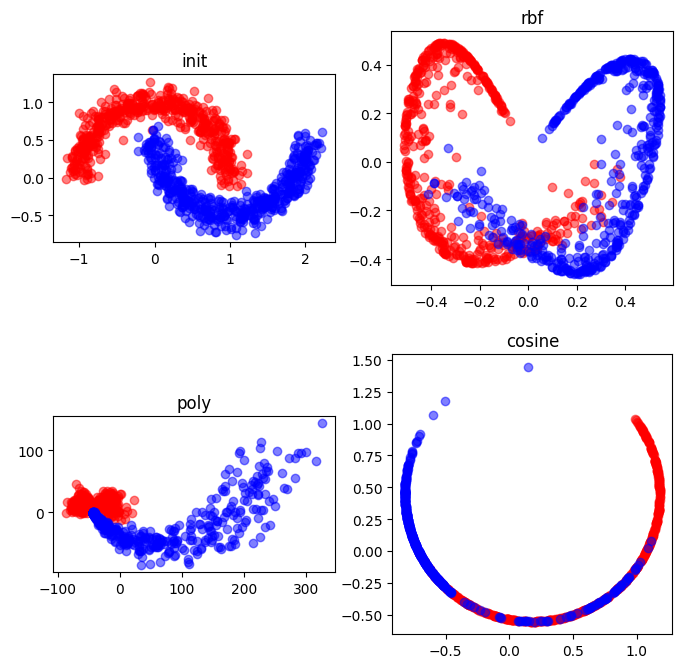

In [41]:
np.random.seed(54242)
KPCA_show(*make_moons(n_samples=1000, noise=0.1))

In [42]:
from mpl_toolkits import mplot3d

In [56]:
X, y = make_circles(n_samples = 1000, factor = 0.1, noise = 0.1)

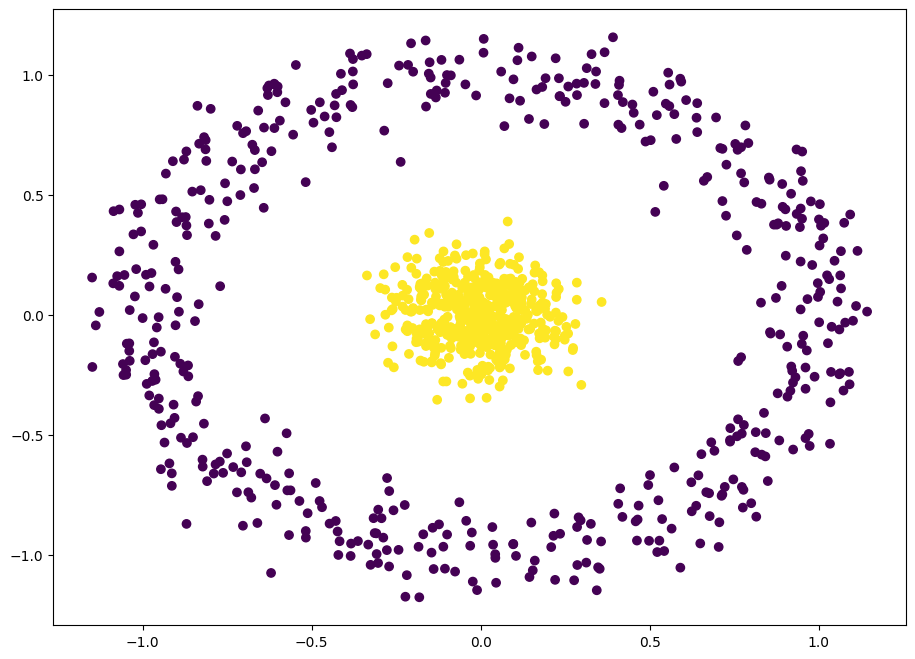

In [57]:
plt.scatter(X[:,0], X[:,1], c=y)

In [58]:
dec = KernelPCA(n_components = 3, kernel = 'rbf', gamma = 3)
new_X = dec.fit_transform(X)

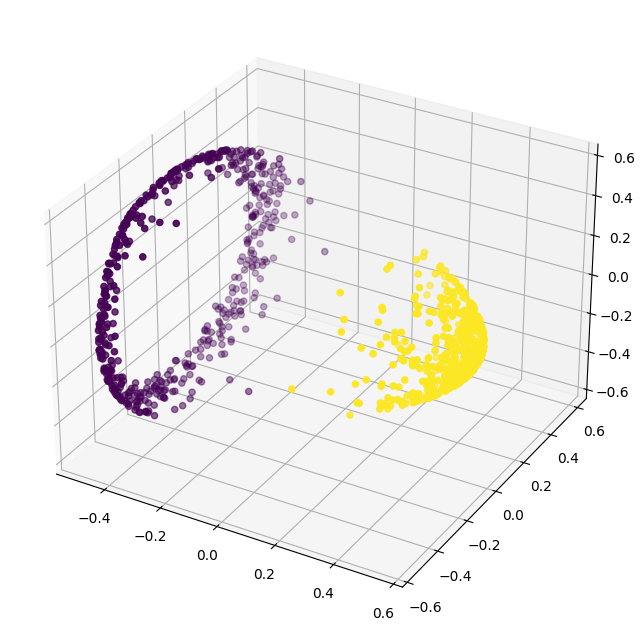

In [59]:
ax = plt.axes(projection='3d')

xdata = new_X[:,0]
ydata = new_X[:,1]
zdata = new_X[:,2]

ax.scatter3D(xdata, ydata, zdata, c=y);

In [60]:
from sklearn.manifold import TSNE

In [61]:
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

(1000, 2)

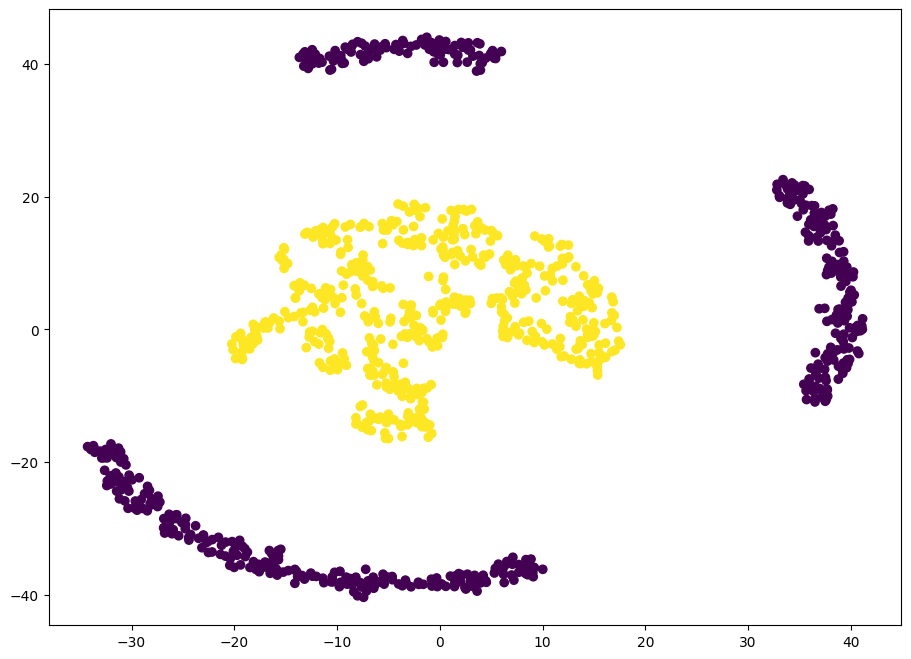

In [62]:
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y)

# Визуализация с помощью t-SNE

In [63]:
from sklearn.datasets import load_digits
digits = load_digits()

In [64]:
X = digits["data"]
y = digits["target"]

In [65]:
X.shape

(1797, 64)

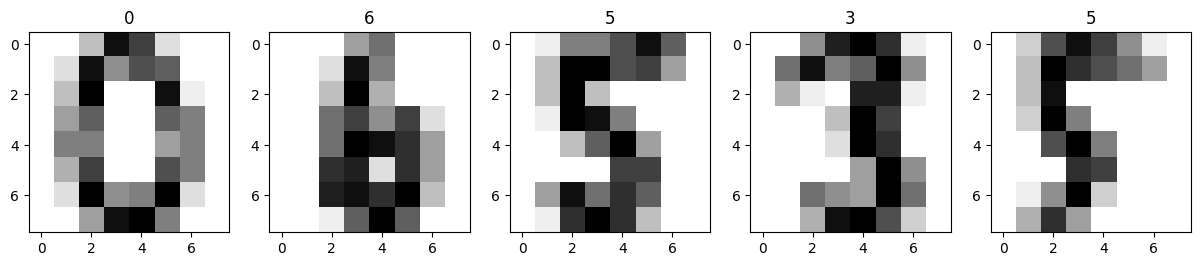

In [66]:
random_idx = np.random.choice(len(X), size=5)
random_digits = X[random_idx, :].reshape(-1, 8, 8)
random_labels = y[random_idx]
fig, ax = plt.subplots(1, 5, figsize=(15, 6))
for i, d in enumerate(random_digits):
    ax[i].imshow(d, cmap='gray_r')
    ax[i].set_title(random_labels[i])

In [67]:
tsne = TSNE(n_components = 2, random_state = 42)
X_reduced = tsne.fit_transform(X)

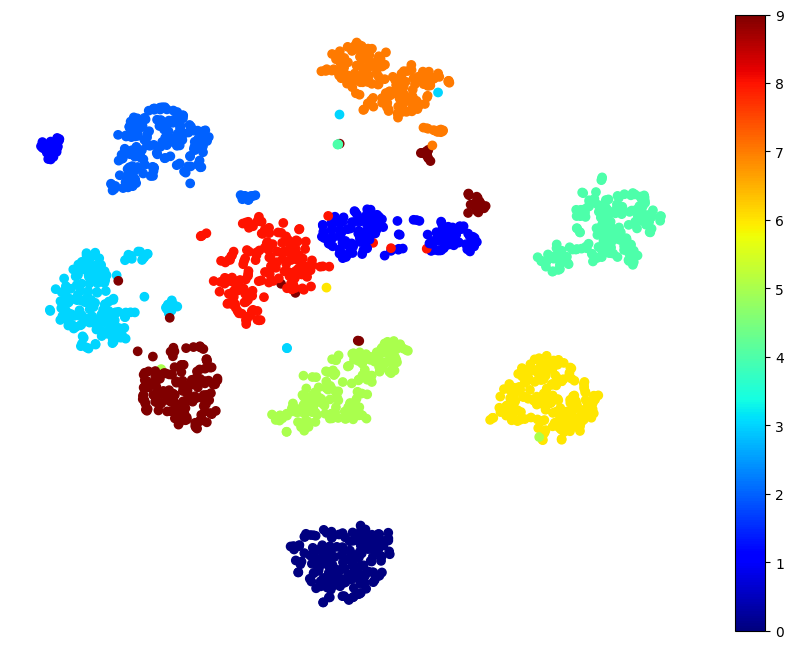

In [68]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

/var/folders/7t/_ywngh7s4vzflssy506tj1m40000gn/T/ipykernel_54839/1167472844.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap("jet")


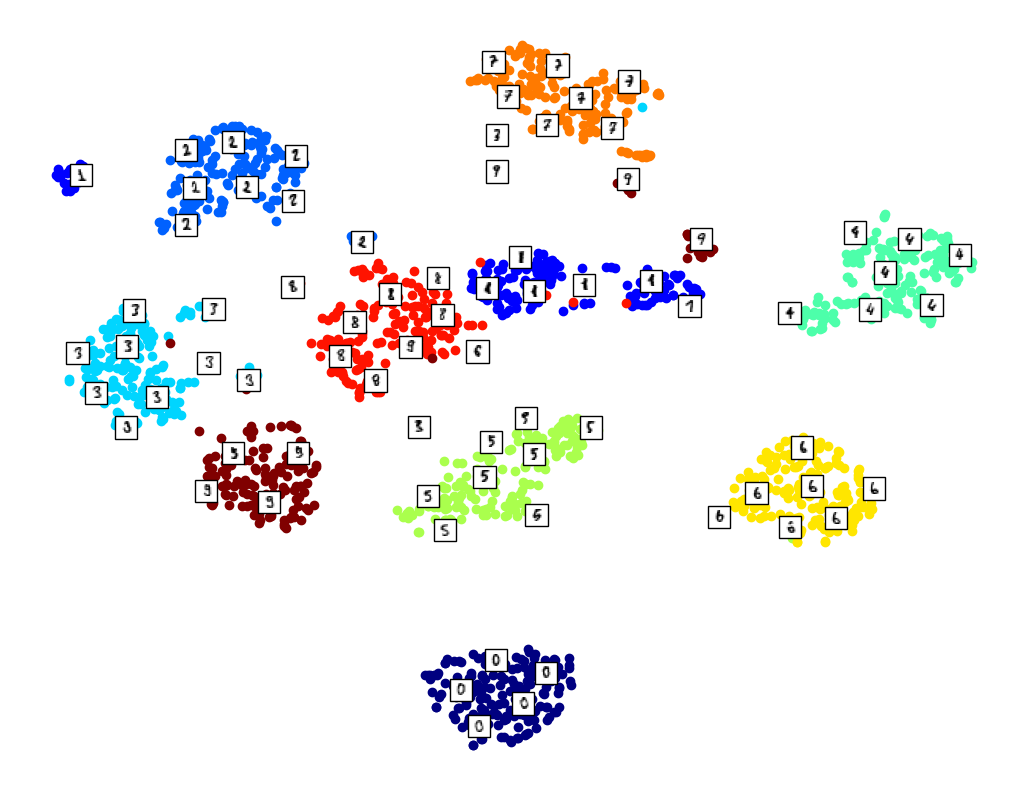

In [69]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib as mpl
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)):
    # Let's scale the input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    # Now we create the list of coordinates of the digits plotted so far.
    # We pretend that one is already plotted far away at the start, to
    # avoid `if` statements in the loop below
    neighbors = np.array([[10., 10.]])
    # The rest should be self-explanatory
    plt.figure(figsize=figsize)
    cmap = mpl.cm.get_cmap("jet")
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=[cmap(digit / 9)])
    plt.axis("off")
    ax = plt.gcf().gca()  # get current axes in current figure
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(np.array(neighbors) - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(y[index] / 9), fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(8, 8)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)
                
plot_digits(X_reduced, y, images=X)